# Results from the by-eye fitting of Sonora Bobcat-2018 Models

This notebook shows the results of by-eye fitting of synthetic data with the `gollum` tool.

In [1]:
from gollum.sonora import SonoraSpectrum
import numpy as np
import matplotlib.pyplot as plt
from specutils import Spectrum1D
import pandas as pd
import astropy.units as u
%config InlineBackend.figure_format='retina'

Read in the results file with pandas:

In [4]:
df = pd.read_excel("../../data/tables/results.xlsx", header = 1 )

In [5]:
df.tail()

,lesson,specimen,Teff_lower,Teff,Teff_upper,logg_lower,logg,logg_upper,vsini_lower,vsini,vsini_upper,rv_lower,rv,rv_upper
4,B,2,1900,0,2400,5.00,0.00,5.50,0.0,0.0,0.0,0.80,0.00,5.50
5,B,3,1600,0,2100,4.00,0.00,4.50,0.0,0.0,30.0,-19.65,0.00,3.75
6,C,1,1100,1675,1800,4.25,4.25,5.25,7.0,19.7,23.0,1.80,-3.25,17.35
7,C,2,1100,1400,1600,4.25,4.50,5.00,16.0,22.0,32.0,32.10,46.85,57.50
8,C,3,550,700,1100,4.25,4.75,5.00,36.0,40.0,40.0,-38.55,-23.00,-15.60


Text(0, 0.5, 'Teff')

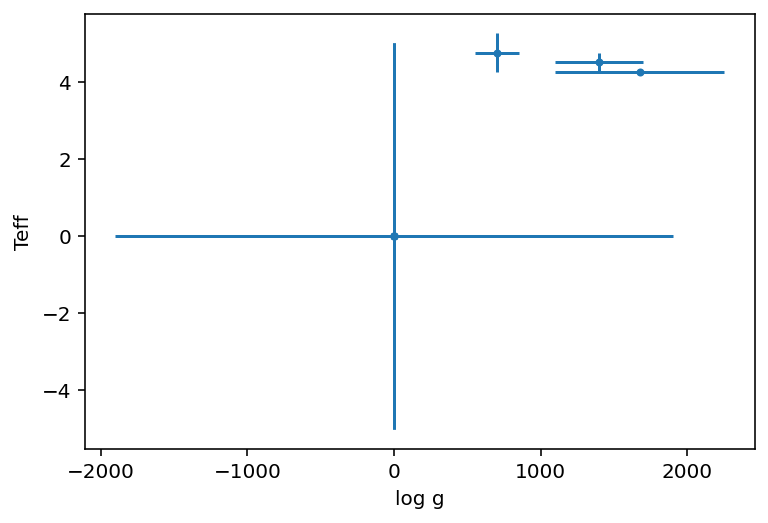

In [17]:
plt.errorbar(df.Teff, df.logg, xerr = df.Teff - df.Teff_lower, yerr= df.logg - df.logg_lower, fmt = ".")
plt.xlabel("log g")
plt.ylabel("Teff")